Usign SciKit-learn for Machine Learning
===


In [1]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
iris = datasets.load_iris()

x, y = iris.data, iris.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

sss = Perceptron(n_iter = 1000)

sss.fit(xtrain, ytrain)

result = sss.predict([[3, 5, 4, 2], [2, 4, 5, 3]])
print(result)
print(iris.target_names[result])

ypred = sss.predict(xtest)
print(classification_report(ytest, ypred, target_names = iris.target_names))

[0 2]
['setosa' 'virginica']
             precision    recall  f1-score   support

     setosa       1.00      0.85      0.92        13
 versicolor       0.77      1.00      0.87        10
  virginica       1.00      0.93      0.97        15

avg / total       0.94      0.92      0.92        38



To evaluate results, we look at four different values:
1. True positives
2. False positives
3. True negatives
4. False negatives

Precision is given by the formula t_p / (t_p + f_p)

Recall is given by the formula tp / (t_p + f_n)

[[11  2  0]
 [ 0 10  0]
 [ 0  1 14]]
['setosa' 'versicolor' 'virginica']


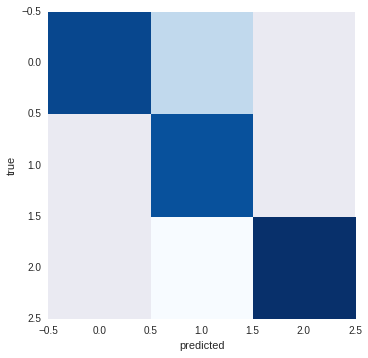

In [17]:
ypred = sss.predict(xtest)
print (confusion_matrix(ytest, ypred))
print (iris.target_names)
plt.imshow(np.log(confusion_matrix(ytest, ypred)), cmap = 'Blues', interpolation = 'nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

### Mystery Data Set

In [4]:
# Load data from mystery.csv
m = pd.DataFrame.from_csv('mystery.csv', index_col = None, header = None)

m_train = m.iloc[:, [0, 1]].sample(int(0.8 * len(m)))
m_target = np.ravel(m.iloc[m_train.index, [2]].values)

m_test = m.iloc[:, [0, 1]].drop(m_train.index)
m_correct = np.ravel(m.iloc[m_test.index, [2]].values)

# Create a perceptron and train it from the data
p = Perceptron(n_iter = 10000)
p.fit(m_train.values, m_target)

m_pred = p.predict(m_test)

print(classification_report(m_correct, m_pred))


             precision    recall  f1-score   support

         -1       0.64      0.64      0.64        22
          1       0.56      0.56      0.56        18

avg / total       0.60      0.60      0.60        40



Obviously, this can't be separated as is.


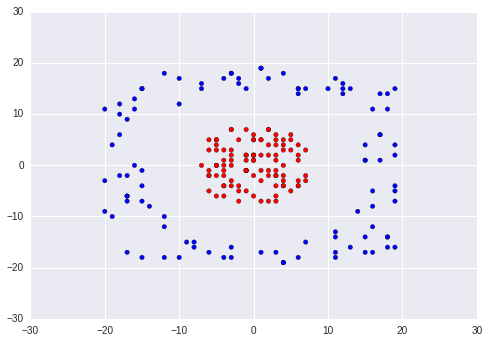

In [5]:
cmap = np.where(m[2].values == -1, 'red', 'blue')

print("Obviously, this can't be separated as is.")
plt.scatter(m[0], m[1], c=cmap)

But the absolute values of these points can.


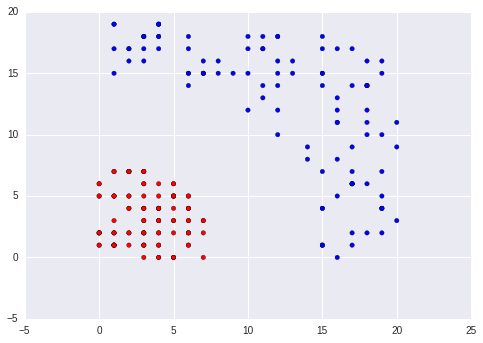

In [6]:
print('But the absolute values of these points can.')
plt.scatter(abs(m[0]), abs(m[1]), c=cmap)

In [7]:
# Create a perceptron and train it from the data
# THIS TIME, HOWEVER, TAKE THE ABSOLUTE VALUE OF EACH INPUT VECTOR
# It works much better

u = Perceptron(n_iter = 100000)
u.fit(abs(m_train.values), m_target)

m_pred = u.predict(abs(m_test))

print(classification_report(m_correct, m_pred))

             precision    recall  f1-score   support

         -1       1.00      1.00      1.00        22
          1       1.00      1.00      1.00        18

avg / total       1.00      1.00      1.00        40



Options for separating the data include:
 - Absolute value
 - Squaring the data
 - Radius from the origin
 - Adding anothe dimension

             precision    recall  f1-score   support

         -1       1.00      1.00      1.00        22
          1       1.00      1.00      1.00        18

avg / total       1.00      1.00      1.00        40



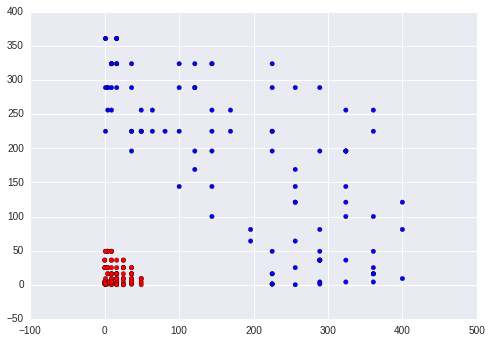

In [8]:
# SQUARE DATA METHOD
plt.scatter(pow(m[0], 2), pow(m[1], 2), c=cmap)

u = Perceptron(n_iter = 100000)
u.fit(pow(m_train.values, 2), m_target)

m_pred = u.predict(pow(m_test, 2))

print(classification_report(m_correct, m_pred))

### Feature Vectors

In [9]:
# Load dataset and separate the input from the target output
digits = datasets.load_digits()
data, target = digits.data, digits.target

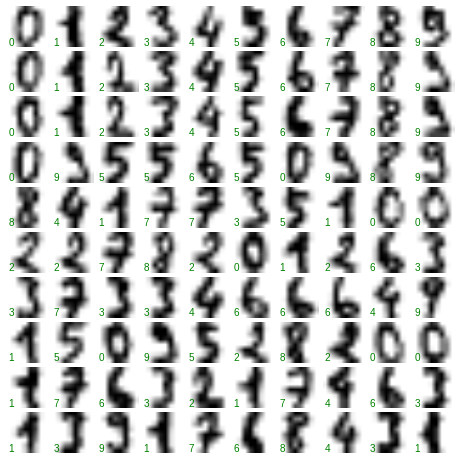

In [10]:
# Create image to show what data looks like
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = 'green')
    ax.set_xticks([])
    ax.set_yticks([])

In [11]:
# Split the data into training and testing groups.
train_data, test_data, train_target, test_target = train_test_split(data, target)

In [12]:
# Train the perceptron with training data
v = Perceptron(n_iter = 1000)
v.fit(train_data, train_target)

# Get results for test data
test_pred = v.predict(test_data)

# Get a classification report for the tested data
print(classification_report(test_target, test_pred))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        51
          1       0.91      0.86      0.89        36
          2       1.00      0.89      0.94        46
          3       0.96      0.93      0.95        56
          4       0.93      0.95      0.94        42
          5       0.89      0.94      0.92        36
          6       1.00      0.92      0.96        39
          7       0.96      0.96      0.96        50
          8       0.78      0.98      0.87        46
          9       0.94      0.94      0.94        48

avg / total       0.94      0.93      0.93       450



In [13]:
# Train the perceptron with training data
q = Perceptron(n_iter = 10000)
q.fit(train_data, train_target)

# Get results for test data
test_pred = q.predict(test_data)

# Get a classification report for the tested data
print(classification_report(test_target, test_pred))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        51
          1       0.89      0.94      0.92        36
          2       0.98      0.91      0.94        46
          3       0.96      0.93      0.95        56
          4       0.93      0.95      0.94        42
          5       0.89      0.94      0.92        36
          6       0.97      0.95      0.96        39
          7       0.96      0.98      0.97        50
          8       0.86      0.91      0.88        46
          9       0.92      0.92      0.92        48

avg / total       0.94      0.94      0.94       450



In this case, for the same data, 10000 iterations seems to be only slightly more precise than 1000 iterations.

# Support Vector Machine

In [14]:
from sklearn.svm import SVC

In [30]:
print("Perceptron\n", classification_report(ytest, ypred))

svc_iris = SVC(kernel = 'linear')
svc_iris.fit(xtrain, ytrain)
iris_pred = svc_iris.predict(xtest)
print("Support Vector Machine: Linear\n", classification_report(ytest, iris_pred, target_names = iris.target_names))

svc_iris = SVC(kernel = 'poly')
svc_iris.fit(xtrain, ytrain)
iris_pred = svc_iris.predict(xtest)
print("Support Vector Machine: Polynomial\n", classification_report(ytest, iris_pred, target_names = iris.target_names))

svc_iris = SVC(kernel = 'rbf')
svc_iris.fit(xtrain, ytrain)
iris_pred = svc_iris.predict(xtest)
print("Support Vector Machine: RBF\n", classification_report(ytest, iris_pred, target_names = iris.target_names))

svc_iris = SVC(kernel = 'sigmoid')
svc_iris.fit(xtrain, ytrain)
iris_pred = svc_iris.predict(xtest)
print("Support Vector Machine: Sigmoid\n", classification_report(ytest, iris_pred, target_names = iris.target_names))

Perceptron
              precision    recall  f1-score   support

          0       1.00      0.85      0.92        13
          1       0.77      1.00      0.87        10
          2       1.00      0.93      0.97        15

avg / total       0.94      0.92      0.92        38

Support Vector Machine: Linear
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.90      0.95        10
  virginica       0.94      1.00      0.97        15

avg / total       0.98      0.97      0.97        38

Support Vector Machine: Polynomial
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.91      1.00      0.95        10
  virginica       1.00      0.93      0.97        15

avg / total       0.98      0.97      0.97        38

Support Vector Machine: RBF
              precision    recall  f1-score   support

     setosa       1.00      1.00 

From the classification reports above, the sigmoid kernel seems to be inappropriate for the dataset. The RBF option seems to be the best option.

In [29]:
print("Perceptron\n", classification_report(test_target, test_pred))

svc_digits = SVC(kernel = 'linear')
svc_digits.fit(train_data, train_target)
digits_pred = svc_digits.predict(test_data)
print("Support Vector Machine: Linear\n", classification_report(test_target, digits_pred))

svc_digits = SVC(kernel = 'poly')
svc_digits.fit(train_data, train_target)
digits_pred = svc_digits.predict(test_data)
print("Support Vector Machine: Polynomial\n", classification_report(test_target, digits_pred))

svc_digits = SVC(kernel = 'rbf')
svc_digits.fit(train_data, train_target)
digits_pred = svc_digits.predict(test_data)
print("Support Vector Machine: RBF\n", classification_report(test_target, digits_pred))

svc_digits = SVC(kernel = 'sigmoid')
svc_digits.fit(train_data, train_target)
digits_pred = svc_digits.predict(test_data)
print("Support Vector Machine: Sigmoid\n", classification_report(test_target, digits_pred))

Perceptron
              precision    recall  f1-score   support

          0       1.00      0.94      0.97        51
          1       0.89      0.94      0.92        36
          2       0.98      0.91      0.94        46
          3       0.96      0.93      0.95        56
          4       0.93      0.95      0.94        42
          5       0.89      0.94      0.92        36
          6       0.97      0.95      0.96        39
          7       0.96      0.98      0.97        50
          8       0.86      0.91      0.88        46
          9       0.92      0.92      0.92        48

avg / total       0.94      0.94      0.94       450

Support Vector Machine: Linear
              precision    recall  f1-score   support

          0       1.00      0.98      0.99        51
          1       0.97      0.97      0.97        36
          2       1.00      1.00      1.00        46
          3       0.98      1.00      0.99        56
          4       0.95      1.00      0.98        4

From the classification reports above, the sigmoid function seems to be inappropriate for this dataset. A linear or polynomial kernel seems to be the best option.